In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from globalfunction import vv

In [2]:
#housing = vv.get_combined_dataset(HOW="left", early_duplicates=True, row_limit=500)
housing = vv.get_combined_dataset(HOW="left", early_duplicates=True)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764


In [3]:
housing2 = housing[['location.longitude','location.latitude','bedrooms','Price']]
housing2.info()
housing2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24139 entries, 85780593 to 114438299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location.longitude  24125 non-null  float64
 1   location.latitude   24125 non-null  object 
 2   bedrooms            23227 non-null  float64
 3   Price               24139 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


,location.longitude,location.latitude,bedrooms,Price
ids,,,,
85780593,-0.398053,51.565111,3.0,600000.0
84063279,-0.482042,51.523983,3.0,500000.0
123799475,-0.417258,51.511115,3.0,500000.0
117435116,-0.479090,51.53775,3.0,500000.0
119764643,-0.477813,51.544998,NaN,500000.0


In [4]:
housing2['Price'] = pd.to_numeric(housing2['Price'], 'coerce').dropna().astype(float)
housing2['location.latitude'] = pd.to_numeric(housing2['location.latitude'], 'coerce').dropna().astype(float)
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24139 entries, 85780593 to 114438299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location.longitude  24125 non-null  float64
 1   location.latitude   24121 non-null  float64
 2   bedrooms            23227 non-null  float64
 3   Price               24103 non-null  float64
dtypes: float64(4)
memory usage: 1.4 MB


/tmp/ipykernel_4979/1944207543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing2['Price'] = pd.to_numeric(housing2['Price'], 'coerce').dropna().astype(float)
/tmp/ipykernel_4979/1944207543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing2['location.latitude'] = pd.to_numeric(housing2['location.latitude'], 'coerce').dropna().astype(float)


In [5]:
housing2
housing2.describe()

,location.longitude,location.latitude,bedrooms,Price
count,24125.000000,24121.000000,23227.000000,24103.000000
mean,-0.113047,51.482018,2.022302,428887.291997
std,0.679830,0.070214,0.859662,111667.407938
min,-0.498166,51.298320,1.000000,100000.000000
25%,-0.211685,51.432022,1.000000,350000.000000
50%,-0.105460,51.483602,2.000000,435000.000000
75%,-0.015109,51.526475,3.000000,525000.000000
max,51.476357,51.683185,6.000000,700000.000000


In [6]:
housing2.head()

,location.longitude,location.latitude,bedrooms,Price
ids,,,,
85780593,-0.398053,51.565111,3.0,600000.0
84063279,-0.482042,51.523983,3.0,500000.0
123799475,-0.417258,51.511115,3.0,500000.0
117435116,-0.479090,51.537750,3.0,500000.0
119764643,-0.477813,51.544998,NaN,500000.0


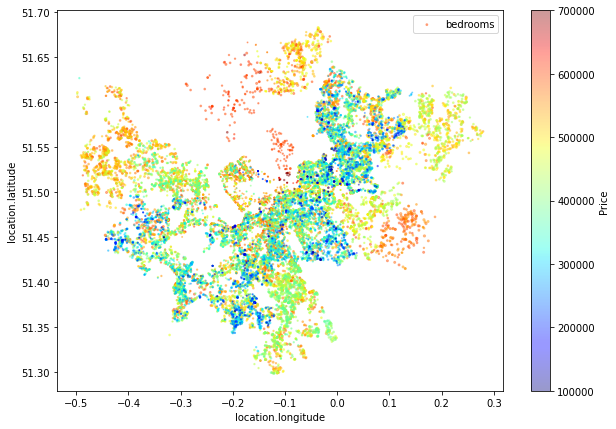

In [7]:
#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#housing.plot(kind="scatter", x="location.longitude", y="location.latitude",
housing2.plot(kind="scatter", x="location.longitude", y="location.latitude",
             alpha=0.4,
             #s=housing["population"]/100, label="population", figsize=(10,7),
             #s=housing["bedrooms"]/100, label="bedrooms", figsize=(10,7),
             s=housing["bedrooms"], label="bedrooms", figsize=(10,7),
             #c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False
              #,ylim=(50.95,51.05)

             )

plt.legend()
#save_fig("housing_prices_scatterplot")